***
# 4.1 Bio-mechanic Estimationsfor Bird 26
### JX, 03/19/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

In [1]:
indv = 'Bird26'

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

note_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels
0,0,2.530000,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-7.5537066, 8.209083]",21,21|0|1.0|1.0|0.0|nan|nan|nan|nan,154,4
1,0,2.530000,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.6834063, 9.239816]",11,11|0|0.0|1.0|0.0|1.0|0.0|0.0|nan,14,2
2,0,2.530000,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.5902307, -12.39612]",0,0|0|0.0|0.0|1.0|0.0|nan|nan|nan,1,0
3,0,2.530000,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7.0395265, 3.0541244]",26,26|1|1.0|0.0|nan|nan|nan|nan|nan,206,19
4,1,7.660000,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1442027, -3.2366111]",12,12|1|0.0|1.0|0.0|nan|nan|nan|nan,37,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1426,7451.938961,7454.270021,2.331060,11,6,7453.230000,7453.347846,0.117846,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 0.00020218813079315542, 0.00039304040322...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.835227, 3.594297]",25,25|1|1.0|1.0|0.0|0.0|nan|nan|nan,195,17
10862,1426,7451.938961,7454.270021,2.331060,11,7,7453.430000,7453.582862,0.152862,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -6.027892231941223e-05, -0.000147847971...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1574388, 3.9381824]",25,25|0|0.0|0.0|nan|nan|nan|nan|nan,188,11
10863,1426,7451.938961,7454.270021,2.331060,11,8,7453.582862,7453.644792,0.061930,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.0007704722401279731, -0.002082758701...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.96411866, 1.086623]",19,19|0|0.0|1.0|1.0|0.0|nan|nan|nan,118,9
10864,1426,7451.938961,7454.270021,2.331060,11,9,7453.786119,7453.917918,0.131800,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -2.3817842366836413e-06, -8.17539332897...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.2781262, -6.882173]",9,9|0|0.0|1.0|0.0|nan|nan|nan|nan,234,27


In [3]:
## Tap into dyadic calculations

In [4]:
import scipy.stats as stats
import numpy as np

In [5]:
def construct_rhythm_df(onsets, syntactic_units, expected_interval_range, note_len = [0]):
    '''
    This function transforms a list of onsets and list of syntactic units for rhythm analyses
    '''
    
    ### DISCOVER ALL INTER-ONSET INTERVALS
    ## Use counter design
    i = 0
    intervals = []
    avg_len = np.mean(note_len)
    
    ## for every note onset
    for onset in onsets:
        
        ## if at last note, exit for loop
        if i == (len(onsets) - 1):
            continue
            
        ## interval = next onset - current onset, add to interval list
        interval = onsets[i + 1] - onsets[i]
        
        ######## IF CONTROL IS ON, substract note_len to nullify note_len, and repopulate with mean note_len
        interval = interval - note_len[i] + avg_len
        
        intervals.append(interval)
        
        ## counter up
        i = i + 1
        
    ## Collect intervals into dyadic formation
    
    ## interval 1 does not include last interval
    intervals1 = list(intervals)
    del(intervals1[-1])
    
    ## interval 2 does not include first interval
    intervals2 = list(intervals)
    del(intervals2[0])
    
    ## Put intervals into datafrmae
    d = {'intervals1': intervals1, 'intervals2': intervals2}
    dyadic = pd.DataFrame(data = d)
    
    ## back propagate label and spec information
    
    ## note identity 1 // Delete last two values
    labels1 = list(syntactic_units)
    del(labels1[-1])
    del(labels1[-1])
    
    ## note identity 2 // Delete first and last value
    labels2 = list(syntactic_units)
    del(labels2[0])
    del(labels2[-1])
    
    ## note identity 3 // Delete first two values
    labels3 = list(syntactic_units)
    del(labels3[0])
    del(labels3[0])
    
    ## fill
    dyadic['label1'] = labels1
    dyadic['label2'] = labels2
    dyadic['label3'] = labels3
    
    ## Sort dyadic into short/long interval
    ### sort all intervals and calculate necessary components
    s_interval = []
    l_interval = []
    cycle_dur = []
    ratio_custom = []
    ratio_roeske = []
    
    ## for every dyadic
    for index, row in dyadic.iterrows():

        i1 = row['intervals1']
        i2 = row['intervals2']

        ## short long decider
        if i1 > i2:
            s = i2
            l = i1
        else:
            s = i1
            l = i2
            
        ## calculate components
        s_interval.append(s)
        l_interval.append(l)
        cycle_dur.append(s + l)
        ratio_roeske.append(i1/(i1+i2))
        ratio_custom.append(s/l)

    ## push into dyadic
    dyadic['s_interval'] = s_interval
    dyadic['l_interval'] = l_interval
    dyadic['cycle_dur'] = cycle_dur
    dyadic['ratio_roeske'] = ratio_roeske
    dyadic['ratio_custom'] = ratio_custom
    
    ## sort ascending by shortest cycle to longest cycle
    dyadic = dyadic.sort_values(by = ['cycle_dur'])
    
    ## filter out transition between phrases
    dyadic = dyadic[dyadic['l_interval'] < expected_interval_range[1]]
    dyadic = dyadic[dyadic['s_interval'] > expected_interval_range[0]]
    
    ## put cycle rank into data frame
    dyadic['cycle_rank'] = dyadic['cycle_dur'].rank().astype(int)
    
    return dyadic

In [6]:
onsets = note_df['note_strt']
syntactic_units = note_df['lasso_labels']
expected_interval_range = [0, 1]
dataset_description = 'Songbird: Pied Butcherbirds'

In [7]:
dyadic = construct_rhythm_df(
    onsets = onsets, 
    syntactic_units = syntactic_units, 
    expected_interval_range = expected_interval_range,
    note_len = note_df['note_len']
)

In [8]:
np.mean(note_df['note_len'])

0.14423228605473912

In [9]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
4125,0.144232,0.144232,4,4,2,0.144232,0.144232,0.288465,0.500000,1.000000,11
2142,0.144232,0.144232,10,17,17,0.144232,0.144232,0.288465,0.500000,1.000000,11
2143,0.144232,0.144232,17,17,17,0.144232,0.144232,0.288465,0.500000,1.000000,11
75,0.144232,0.144232,10,16,18,0.144232,0.144232,0.288465,0.500000,1.000000,11
1897,0.144232,0.144232,4,4,2,0.144232,0.144232,0.288465,0.500000,1.000000,11
...,...,...,...,...,...,...,...,...,...,...,...
6731,0.328468,0.633028,34,34,4,0.328468,0.633028,0.961496,0.341622,0.518884,8010
5143,0.148016,0.966149,7,12,33,0.148016,0.966149,1.114165,0.132849,0.153202,8011
8981,0.946524,0.210926,2,33,34,0.210926,0.946524,1.157450,0.817767,0.222843,8012
8980,0.223212,0.946524,24,2,33,0.223212,0.946524,1.169735,0.190822,0.235823,8013


## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [10]:
import numpy as np
import numpy.random as random
import seaborn as sns

In [11]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [12]:
interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
uni_ratio = interval1_uni / (interval1_uni + interval2_uni)

<AxesSubplot:ylabel='Count'>

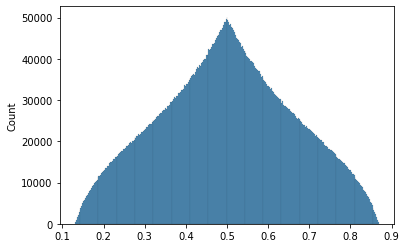

In [13]:
sns.histplot(uni_ratio)

## plot

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR

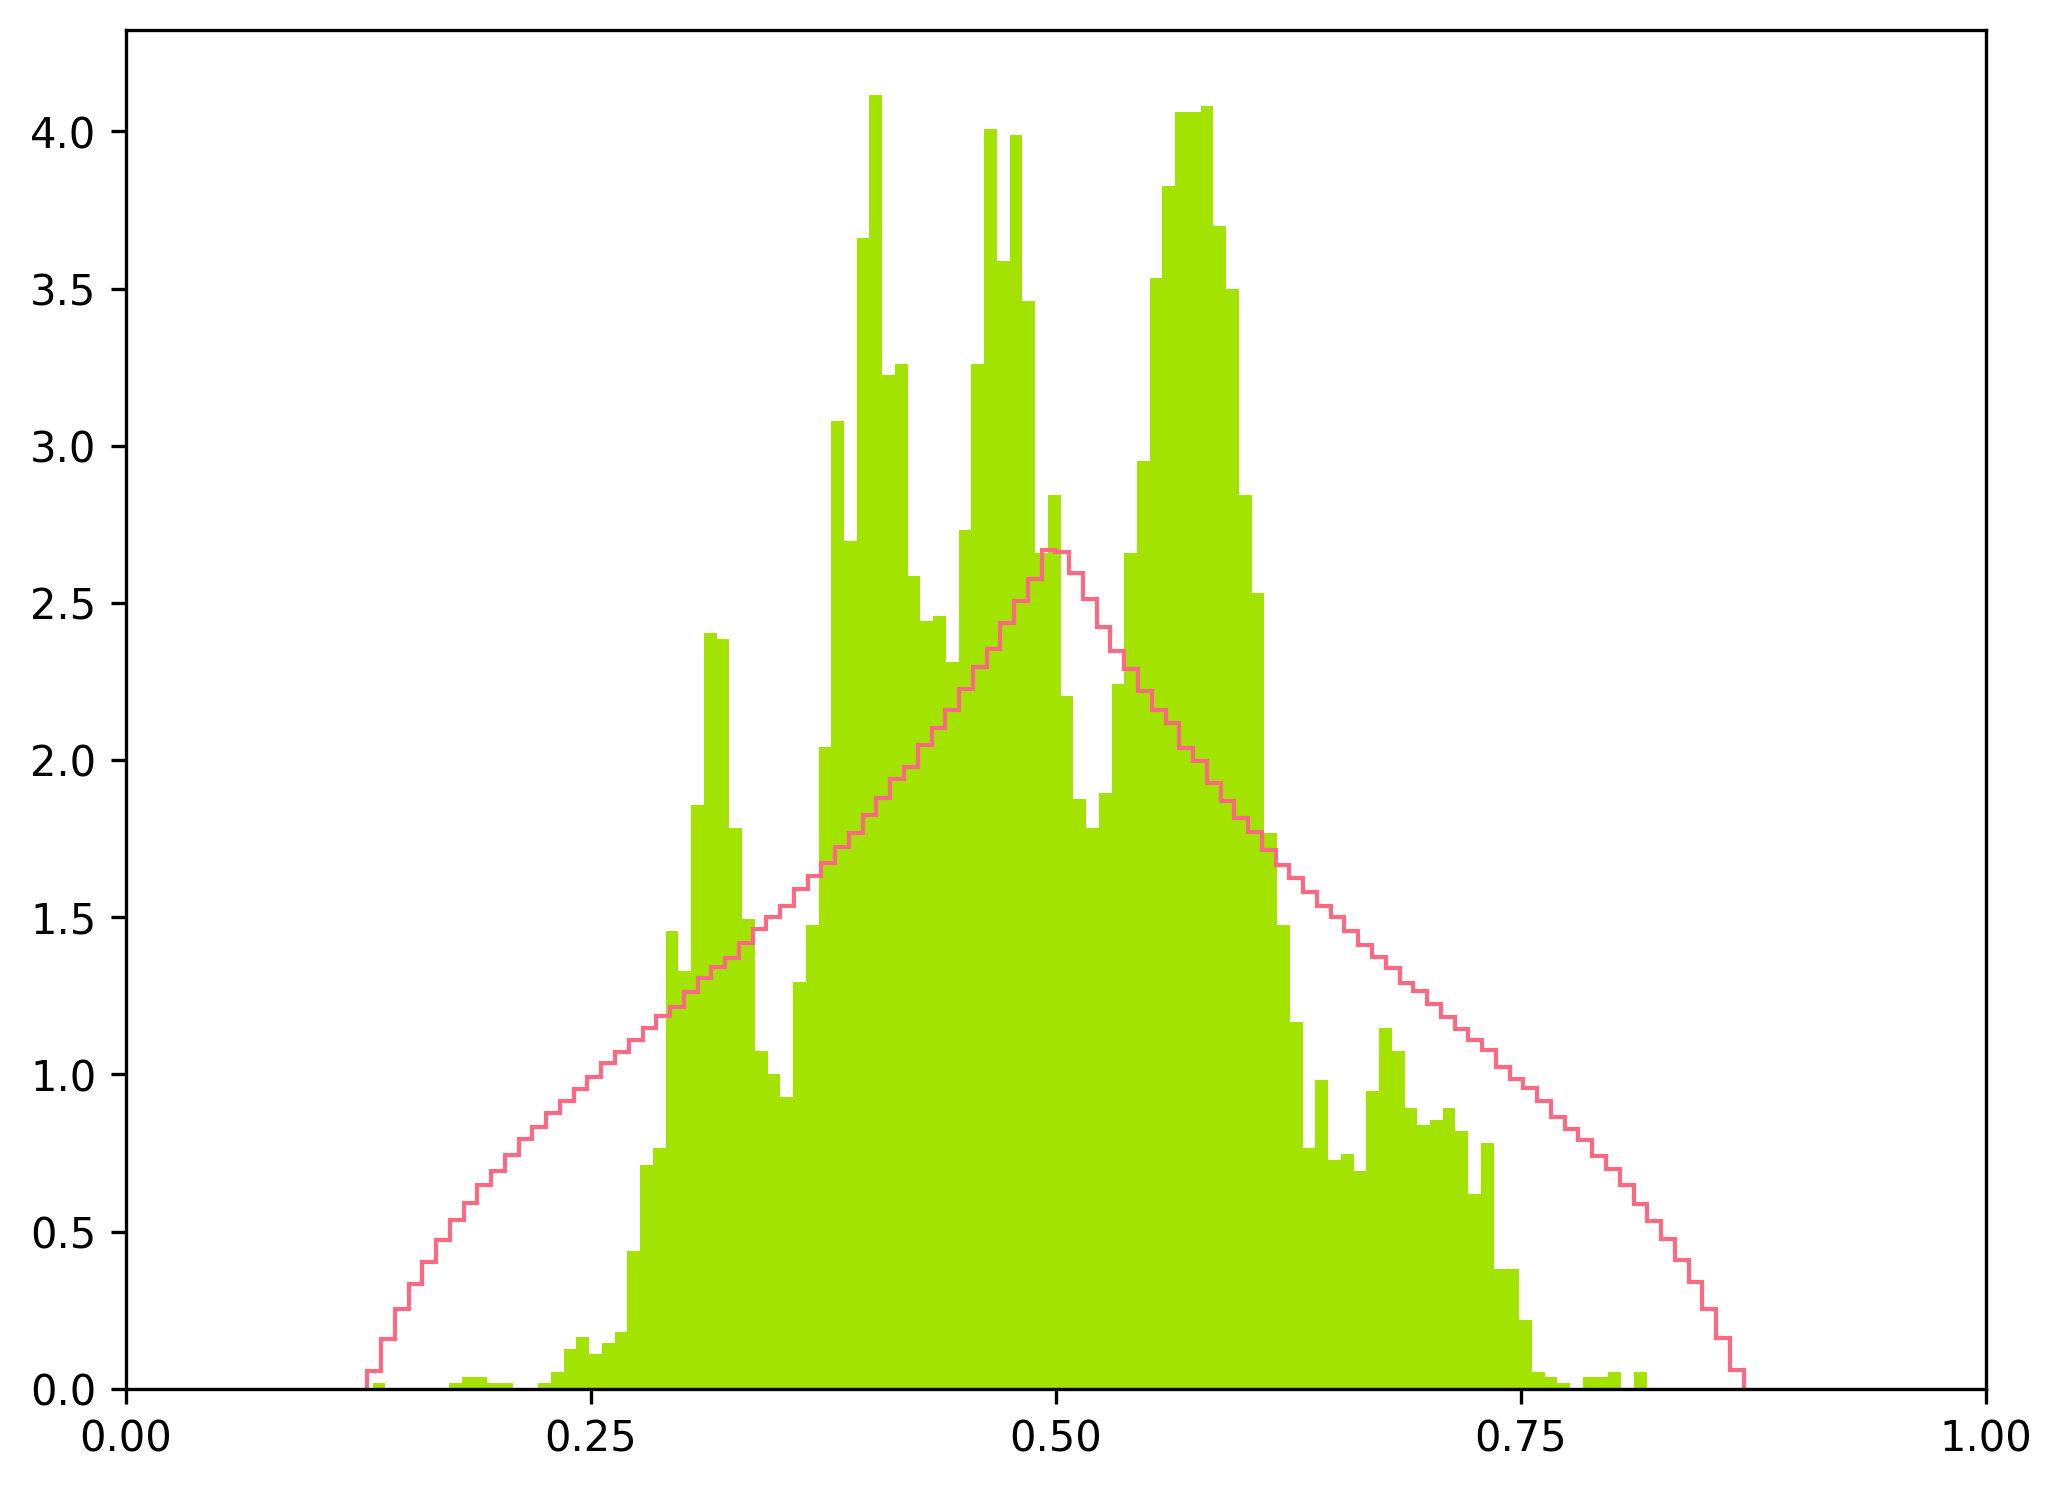

In [18]:
figure(figsize = (8, 6), dpi = 300)

fig = plt.hist(
    x = dyadic['ratio_roeske'],
    bins = 100,
    density = True,
    color = '#A3E301'
)

uni = plt.hist(
    x = uni_ratio,
    histtype = 'step', 
    density = True,
    bins = 100,
    color = '#FC6983'
)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'lengthcontrol_rhythm_' + indv + '.svg'
plt.savefig(FIGURE_DIR/figname)

## Find Consistent Transitions (Copied from 3.1)

In [ ]:
from butcherbird import sequential

In [ ]:
import numpy as np

In [ ]:
trans_mat = sequential.construct_seq_matrix(note_df, label = 'lasso_labels', sort = False)

In [ ]:
## bootstrap null distributions with 100 samples under 0-order syntax assumption

In [ ]:
p_container = []

## sample 100 times
for i in np.arange(0, 100):
    
    ## bootstrap one zero-order sequence
    bootstrapped_df = note_df.sample(n = len(note_df), replace = True).reset_index()
    
    ## find the transition matrix of the sequence
    bootstrapped_mat = sequential.construct_seq_matrix(bootstrapped_df, label = 'lasso_labels', sort = False)
    
    ## turn the matrix into long form
    bootstrapped_long = sequential.long_cvtr(bootstrapped_mat, songType = 'Bootstrapped')
    
    ## return bootstrapped distribution of all transition probabilities
    p_container.append(bootstrapped_long.p.values)
    
p_container

In [ ]:
## swap axes so that each element in p_container is a null sampling distribution of 
## find how likely that specific transition happpens with just 0 order syntax

In [ ]:
p = np.swapaxes(p_container, 0, 1)

In [ ]:
p

In [ ]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
higherconfints = []

for null_transitions in p:
    higherconfints.append(mean_confidence_interval(null_transitions, confidence = 0.95)[2])
    
higherconfints

In [ ]:
trans_long = sequential.long_cvtr(trans_mat, songType = 'True')

In [ ]:
trans_long

In [ ]:
trans_long['higherconfint'] = higherconfints

In [ ]:
trans_long

In [ ]:
filtered_trans_long = trans_long[trans_long.p > trans_long.higherconfint]

In [ ]:
filtered_trans_long

In [ ]:
ftl = filtered_trans_long

In [ ]:
## verify rhythm counts above 0.01 of total rhythm count (8013 * 0.01)

In [ ]:
verified = []

for index, transition in ftl.iterrows():
    note = transition.noteType
    dest = transition.markov
    
    ## find if dyadic contains enough entries for this particular combination
    first_filter = dyadic[dyadic.label1 == note]
    second_filter = first_filter[first_filter.label2 == dest]
    
    if len(second_filter) > 0.01*len(dyadic):
        verified.append(index)

In [ ]:
vr = ftl.filter(items = verified, axis = 0)

In [ ]:
unique, counts = np.unique(vr.noteType, return_counts = True)

In [ ]:
eligible_notes = []
for noteType, count in zip(unique, counts):
    if count > 1:
        eligible_notes.append(noteType)

In [ ]:
eligible_transitions = []

for n in eligible_notes:
    eligible_transitions.append(vr[vr.noteType == n])
    
eligible_transitions = pd.concat(eligible_transitions)

In [ ]:
eligible_transitions

In [ ]:
import scipy.stats

def bif_rhythm_ks(vd_bif, dyadic, mode = 'ratio_roeske'):
    '''
    Calculate KS test for each bifurcation point
    '''
    
    output = []
    
    # 1. Extract Bifurcation Info from vd_bif
    ### a. Find all pre-bifurcation notes
    pre_bif = np.unique(vd_bif['noteType'])
    
    # 2. For each bifurcation, conduct a Kolmogorov-Smirnov test
    ### a. for each bifurcation
    for note in pre_bif:
        ### a. Query its exact slice
        bif_df = vd_bif[vd_bif['noteType'] == note]
        ### b. Query its bifurcation destinations (assumes only 2)
        t1 = bif_df['markov'].values[0]
        t2 = bif_df['markov'].values[1]
        ### c. Filter dyadic by pre_bif
        note_df = dyadic[dyadic['label1'] == note]
        ### d. Filter note_df by bif destinations
        t1_df = note_df[note_df['label2'] == t1]
        t2_df = note_df[note_df['label2'] == t2]
        ### e. compute ks
        try:
            ks = scipy.stats.ks_2samp(t1_df[mode], t2_df[mode])
        except:
            ks = [None, None]
            print('ks not computed')
        ### e. feeds out pandas
        output.append(
            pd.DataFrame(
                {
                    'pre_bif': [note],
                    'bif_des': [(t1, t2)],
                    'bif_prof': [
                        (
                            bif_df['p'].values[0],
                            bif_df['p'].values[1]
                        )
                    ],
                    'rhy_cnts': [
                        (
                            len(t1_df),
                            len(t2_df)
                        )
                    ],
                    'ks_statistic': [ks[0]],
                    'ks_p': [ks[1]]
                }
            )
        )
        
        print('Finished querying bifurcation with pre_bif ', note)
    return pd.concat(output)

In [ ]:
entangle = bif_rhythm_ks(eligible_transitions, dyadic)

In [ ]:
entangle

In [ ]:
entangle['ks_p'] < 0.05

In [ ]:
## do a shuffle
dyadic_shuffle = dyadic.copy(deep = True)
np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
entangle = bif_rhythm_ks(eligible_transitions, dyadic_shuffle)

In [ ]:
entangle

# Compute Global Statistic

The concept of the global statistic here is to compare the rhythm ratios for each first-order syntax and to compare between-group variation / within-group variation. 

1. Find each first-order transition -> z-score -> compile all first-order transition -> MSE
2. Compare with zero-order transition -> z-score -> compile all first-order transition -> MSE
3. Is first-order transition variance is lower than zero-order transition variance?

## Let's find all the first-order transitions first

In [ ]:
import scipy.stats as stats

In [ ]:
def syntactic_rhythmic_modulation_metric (dyadic):
    
    ## compute global metric
    
    first_order_rhythms_centered = []
    first_order_group_n = 0

    ## for every possible label
    for label in np.unique(dyadic['label1']):

        ## find a sub dataframe containing only designated zero-order label
        zero_order = dyadic[dyadic['label1'] == label]

        ## for every possible transition of that label
        for transition in np.unique(zero_order['label2']):

            ## find its rhythms
            first_order = zero_order[zero_order['label2'] == transition]
            first_order_rhythms = first_order['ratio_roeske'].values
            first_order_rhythms_centered.extend(first_order_rhythms - np.mean(first_order_rhythms))

            ## add 1 to group_n
            first_order_group_n+=1
    
    # find MSE
    MSE_first = sum(np.square(first_order_rhythms_centered)) / len(dyadic)
    MSE_baseline = sum(np.square(dyadic['ratio_roeske'].values - np.mean(dyadic['ratio_roeske']))) / len(dyadic)
    
    return 1 - MSE_first / MSE_baseline

## empirical 

In [ ]:
syntactic_rhythmic_modulation_metric(dyadic)

## Find Baseline using bootstrap

In [ ]:
from tqdm.autonotebook import tqdm

In [ ]:
dyadic_shuffle = dyadic.copy(deep = True)

SDoMSE = []

for sample in tqdm(np.arange(0, 100)):
    
    ## shuffle dyadic
    np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
    
    SDoMSE.append(syntactic_rhythmic_modulation_metric(dyadic_shuffle))

In [ ]:
mean_confidence_interval(SDoMSE, confidence=0.95)

In [ ]:
syntactic_rhythmic_modulation_metric(dyadic)

## try using anova

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
dyadic = dyadic.astype({'label1': str, 'label2': str})

In [ ]:
model = ols('ratio_roeske ~ label1', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
dyadic['transition'] = dyadic['label1'] + '+' + dyadic['label2']

In [ ]:
dyadic

In [ ]:
model = ols('ratio_roeske ~ transition', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table